Lab note
===
**31/08/2020
Y. Fujii and S. Dekkers**

First test with Plastic Optical Fibre (POF), 1m cut by myself.

Green LED found in the stock room.

* Using internal signal generator of PS6404C as a LED driver
    * Start frequency 8MHz, square pulse, amplitude 2V, offset 1V, Triggers AUX input
    * External AUX from Function generator, 500Hz square, 1% duty, Low 0V, High 1V
    * See also [here](https://drive.google.com/file/d/15cAnjlMly5KDXla8r4-L91rBEY9AGxqW/view?usp=sharing)
    
    
* Preparing the DAQ...
    * DAQ alsmost done

**01/09/2020
Y. Fujii and S. Dekkers**

Add Bias-tee circuit between the pulse generator and the LED
* Size of signal improved significantly
* See data for more details..




**03/09/2020
Y. Fujii and S. Dekkers**

Change Green LED to **405ns** peak LED

In the DAQ mode, I had to set the voltage twice larger as it is in scope mode for picoscope.

For scope mode, 900mV is used while for DAQ mode 1800mV is used. (need some investigation later...)

Place and format of files...

* Directory: `/home/comet/work/pico/data`
* File name: `test_hvXX_YYm_MAT_LEDZZZnm_#.npy`
    * `XX=HV`, `YY=length of fibre`, `MAT=plastic or glass`, `ZZZ=Wavelength of LED`, `#=sub run ID` 

**Quick summary of each data**

| <br>Wavelength (nm)/</br><br>Pulse heigt (mV)</br> | Fibre 1m | Fibre 10m |
|--|---|---|
| <br><font size="5">405/</font></br><br><font size="5">1800</font></br> | <img src="./figs/LED405nm_SiPM42V_Fibre1m.png" width="375"> | <img src="./figs/LED405nm_SiPM42V_Fibre10m.png" width="375"> |
| <br><font size="5">385/</font></br><br><font size="5">2000</font></br> | <img src="./figs/LED385nm_SiPM42V_Fibre1m.png" width="375"> | <img src="./figs/LED385nm_SiPM42V_Fibre10m.png" width="375"> |
| <br><font size="5">470/</font></br><br><font size="5">1700</font></br> | <img src="./figs/LED470nm_SiPM42V_Fibre1m.png" width="375"> | <img src="./figs/LED470nm_SiPM42V_Fibre10m.png" width="375"> |
| <br><font size="5">525/</font></br><br><font size="5">1546</font></br> | <img src="./figs/LED525nm_SiPM42V_Fibre1m.png" width="375"> | <img src="./figs/LED525nm_SiPM42V_Fibre10m.png" width="375"> |


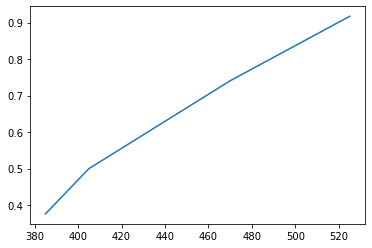

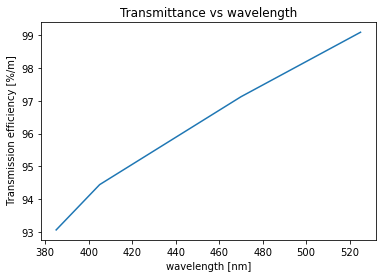

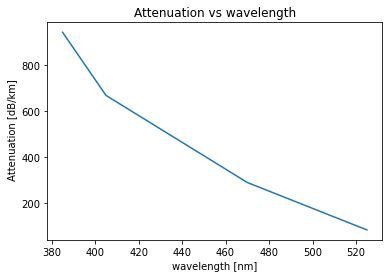

In [2]:
import numpy as np
import scipy as sc
#import pandas as pd
import matplotlib.pyplot as plt

ratio=np.array([1./2.66,1./2.00,1./1.35,1./1.09]) #
att=-np.log10((ratio))*(1./9.)*1e3*20 # Attenuation [dB/km]
trans=(1.0-(1.0-ratio)*(1./9.))*100.0 # Transmission efficiency for 1m
wvlen=np.array([385,405,470,525])     # nm


plt.plot(wvlen,ratio)
plt.show()

plt.plot(wvlen,trans)
plt.title('Transmittance vs wavelength')
plt.xlabel('wavelength [nm]')
plt.ylabel(' Transmission efficiency [%/m]')
plt.show()

plt.plot(wvlen,att)
plt.title('Attenuation vs wavelength')
plt.xlabel('wavelength [nm]')
plt.ylabel(' Attenuation [dB/km]')
plt.show()


**21/09/2020
Y. Fujii and S. Dekkers**

    LV1 : 15.28V, 0.05-0.06A
    LV2 :  5.11V, 0.10A
    * LV1 for 500MHz RF amp, LV2 for 2400MHz RF amp and LED's DC offset

* On last Friday, all fibres' ends were polished down to **3µm** sheet
* Current known issue, instability of support structire at the LED side
    * Expected to be solved by using clamps
    * Space too small so that loger fibres are winded with bending radii of about 35cm

**V_mppc** = 42V for all measurements

around 15:00

I couldn't see the signal. LED (385nm) has been checked and found that one pin was broken.
Replace it to the new one..

**16:00** Data taking with glass fibre 9m, LED-385nm

**17:05** Data taking with glass fibre 1m, LED-385nm

**Sometime in between** Data taking with POF fibre 1m, LED-385nm

**17:55** Data taking with POF fibre 9m, LED-385nm

|   | Fibre material | Fibre length (m) | LED peak wavelength (nm) | Pulsing voltage (mV) |
|---|---|---|---|---|
| **setup1** | POF   | 9 | 405 |  870 |
| **setup2** | POF   | 1 | 405 |  870 |
| **setup3** | Glass | 1 | 405 |  870 |
| **setup4** | Glass | 9 | 405 |  870 |
| **setup5** | Glass | 9 | 385 | 1000 |
| **setup6** | Glass | 1 | 385 | 1000 |
| **setup7** | POF   | 1 | 385 | 1000 |
| **setup8** | POF   | 9 | 385 | 1000 |

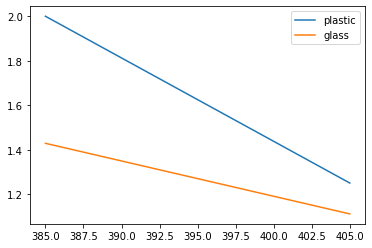

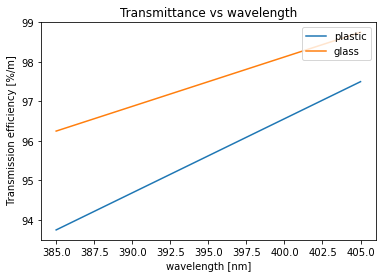

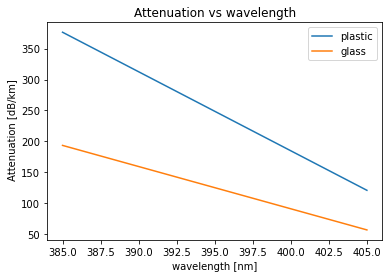

In [8]:
import numpy as np
import scipy as sc
#import pandas as pd
import matplotlib.pyplot as plt


##### They are filled with arbitrary numbers for now!!
peakG=np.array([[10,10],[7,9]]) # 1m / 9m
peakP=np.array([[10,10],[5,8]]) # 1m / 9m
ratioG=peakG[0]/peakG[1]
ratioP=peakP[0]/peakP[1]

def calcAtt(ratio,len1,len2): # len1<len2
    lRatio=len1/(len2-len1)
    return np.log10((ratio))*lRatio*1e3*10 # Attenuation [dB/km]

def calcTrans(ratio,len1,len2):
    lRatio=len1/(len2-len1)
    return np.power((1.0-(1.0-1./ratio)*lRatio),1)*100.0 # Transmission efficiency for 1m

attG=calcAtt(ratioG,1,9)
attP=calcAtt(ratioP,1,9)
transG= calcTrans(ratioG,1,9)
transP= calcTrans(ratioP,1,9)
wvlen=np.array([385,405])     # nm

plt.plot(wvlen,ratioP,label='plastic')
plt.plot(wvlen,ratioG,label='glass')
plt.legend(loc='upper right')
plt.show()

plt.plot(wvlen,transP,label='plastic')
plt.plot(wvlen,transG,label='glass')
plt.legend(loc='upper right')
plt.title('Transmittance vs wavelength')
plt.xlabel('wavelength [nm]')
plt.ylabel(' Transmission efficiency [%/m]')
plt.show()

plt.plot(wvlen,attP,label='plastic')
plt.plot(wvlen,attG,label='glass')
plt.legend(loc='upper right')
plt.title('Attenuation vs wavelength')
plt.xlabel('wavelength [nm]')
plt.ylabel(' Attenuation [dB/km]')
plt.show()

**21/09/2020
Y. Fujii and S. Dekkers**

    LV1 : 15.28V, 0.05-0.06A
    LV2 :  5.11V, 0.10A
    * LV1 for 500MHz RF amp, LV2 for 2400MHz RF amp and LED's DC offset

*Continue measurements from yesterday..*

**-- Nobody can be louder than Mr. Loud Voice --**

**LED470nm**

**11:00-** Plastic fibre 9m

**11:30-** Plastic fibre 1m

**11:50-** Glass fibre 1m

**12:10-** Glass fibre 9m

**LED525nm**

**13:40-** Glass fibre 9m

**14:05-** Glass fibre 1m

**15:20-** Plastic fibre 1m

**15:30-** Plastic fibre 9m

**LED585nm**

**15:40-** Plastic fibre 9m

**16:15-** Plastic fibre 1m

**16:25-** Glass fibre 1m

**16:40-** Glass fibre 9m

**LED626nm**

**NOTE** Oscilloscope data cannot be acquired due to the limited voltage in GUI mode..

**17:00-** Glass fibre 9m

**17:10-** Glass fibre 1m

**17:20-** Plastic fibre 1m

**17:40-** Plastic fibre 9m


**17:50** Turn off devices

|   | Fibre material | Fibre length (m) | LED peak wavelength (nm) | Pulsing voltage (mV) |
|---|---|---|---|---|
|  **setup9** | POF   | 9 | 470 |  850 |
| **setup10** | POF   | 1 | 470 |  850 |
| **setup11** | glass | 1 | 470 |  850 |
| **setup12** | glass | 9 | 470 |  850 |
| **setup13** | glass | 9 | 525 |  775 |
| **setup14** | glass | 1 | 525 |  775 |
| **setup15** | POF   | 1 | 525 |  775 |
| **setup16** | POF   | 9 | 525 |  775 |
| **setup17** | POF   | 9 | 585 |  360 |
| **setup18** | POF   | 1 | 585 |  360 |
| **setup19** | glass | 1 | 585 |  360 |
| **setup20** | glass | 9 | 585 |  360 |
| **setup21** | glass | 9 | 626 |  220 |
| **setup22** | glass | 1 | 626 |  220 |
| **setup23** | POF   | 1 | 626 |  220 |
| **setup24** | POF   | 9 | 626 |  220 |